In [1]:
import scipy as sp
from scipy import stats, optimize, interpolate
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" #'last' 기본값

# 36절: 검정과 유의확률

# 검정과 모수 추정의 의미

데이터 분석의 첫번째 가정
> 분석하고자 하는 데이터가 어떤 확률 변수(random variable)로부터 실현(realized)된 표본(sample)이다.

데이터는 이 확률 변수를 알아내기 위한 일련의 참고 자료일 뿐이다. <br>
확률 변수는 분포 모형(distribution model)과 모수(parameter)를 가진다.


* 검정(test) 또는 모수 추정(parameterestimation)

    1. 해당 데이터가 특정한 분포 모형, 예를 들면 가우시안 정규 분포로부터 생성된 것인가?
        
        첫번째 질문은 확률 변수의 분포에 대한 가설(hypothesis)
        맞는지 틀리는지를 확인하는 확률 변수의 분포 검정(distribution test)
        확률 변수의 분포가 정규 분포를 띄는지 확인 정규성 검정(normality test)
    
    
    2. 만약 그렇다면 그 정규 분포의 기댓값 모수 μ 와 분산 σ2 이 특정한 값을 가지고 있는가? 예를 들면 μ=0  인가 아닌가?
    
        확률 밀도 함수(pdf)의 계수(coefficient) 즉, 모수(parameter)가 특정한 값을 가지는지 
        혹은 특정한 값과 비교하여 큰지 작은지를 확인하는 과정 모수 검정(parameter test)
    
    3. 정규 분포의 기댓값 모수 μ 가 0이 아니라면 구체적으로 어떤 값을 가질 것인가?

         모수가 실제로 어떤 숫자를 가질 확률이 가장 높은지를 알아내는 작업
         모수 추정(parameter estimation) 또는 추정(estimation)

         MSE(Maximum Squred Error) 방법, MLE(Maximum Likelihood Estimation) 방법 등은 
         가장 확률이 높은 숫자 하나를 결정하는 방법의 하나이며 
         베이지안 추정법(Bayesian Estimation)은 가능한 모든 값에 대해 
         이 값들이 진짜 모수가 될 확률을 모두 계산하여 분포로 표시하는 방법

# 검정과 유의 확률

검정(testing)은 데이터 뒤에 숨어있는 확률 변수의 분포와 모수에 대한 가설의 진위를 정량적(quantitatively)으로 증명하는 작업

 * 문제1
> 어떤 동전을 15번 던졌더니 12번이 앞면이 나왔다. 이 동전은 휘어지지 않은 공정한 동전(fair coin)인가?


1. 데이터가 어떤 고정된(fixed) 확률 분포를 가지는 확률 변수라고 가정한다. 동전은 베르누이 분포를 따르는 확률 변수의 표본이며 트레이더의 수익률은 정규 분포를 따르는 확률 변수의 표본이라고 가정한다.

2. 이 확률 분포의 모수값이 특정한 값을 가지는지 혹은 특정한 값보다 크거나 같은지 알고자 한다. 동전이 공정한 동전이라고 주정하는 것은 그 뒤의 베르누이 확률 분포의 모수 θ 의 값이 0.5 이라고 주장하는 것과 같다. 트레이더가 장기적으로 돈을 벌어다 줄 것이라고 주장하는 것은 그 뒤의 정규 분포의 기댓값 모수 μ  가 0보다 크거나 같다고 주장하는 것이다.

3. 모수 값이 이러한 주장을 따른다고 가정하면 실제로 현실에 나타난 데이터가 나올 확률을 계산할 수 있다. 동전의 경우에는 공정한 동전임에도 불구하고 15번 중 12번이나 앞면이 나올 확률을 계산할 수 있으며 트레이더의 경우에는 정규 분포에서 해당 데이터가 나올 확률을 계산할 수 있다.

4. 이렇게 구한 확률의 값이 판단자가 정한 특정한 기준에 미치지 못한다면 이러한 주장이 틀렸다고 생각할 수 밖에 없다. 반대로 값이 기준보다 높다면 그 주장이 틀렸다고 판단할 증거가 부족한 것이다.


## 가설

확률 분포에 대한 어떤 주장을 가설(hypothesis)

가설을 증명하는 행위를 통계적 가설 검정(statistical hypothesis testing) 줄여서 검정(testing)이라고 한다. 특히 확률 분포의 모수 값이 특정한 값을 가진다는 주장을 모수 검정 (parameter testing)이라고 한다.

가설은 회귀 분석(regression)에서 흔하게 사용되는데 회귀 계수의 값이 0 이면 종속 변수(target)가 해당 독립 변수(feature)의 영향을 받지 않는 다는 의미가 된다.


## 검정 방법론

* 가설 증명


    1. 만약 가설이 맞다면 즉, 모수 값이 특정한 조건을 만족한다면 해당 확률 변수로부터 만들어진 표본(sample) 데이터들은 어떤 규칙을 따르게 된다.

    2. 해당 규칙에 따라 표본 데이터 집합에서 어떤 숫자를 계산하면 계산된 숫자는 특정한 확률 분포를 따르게 된다. 이 숫자를 검정 통계치(test statistics)라고 하며 확률 분포를 검정 통계 분포(test statisti## 검정 통계량
    
    cs distribution)라고 한다. 검정 통계 분포의 종류 및 모수의 값은 처음에 정한 가설에 의해 결정된다. 이렇게 검정 통계 분포를 결정하는 최초의 가설을 귀무 가설(Null hypothesis)이라고 한다.

    3. 데이터에 의해서 실제로 계산된 숫자, 즉, 검정 통계치가 해당 검정 통계 분포에서 나올 수 있는 확률을 계산한다. 이를 유의 확률(p-value)라고 한다.

    4. 만약 유의 확률이 미리 정한 특정|한 기준값보다 작은 경우를 생각하자. 이 기준값을 유의 수준(significance level)이라고 하는 데 보통 1% 혹은 5% 정도의 작은 값을 지정한다. 유의 확률이 유의 수준으로 정한 값(예 1%)보다도 작다는 말은 해당 검정 통계 분포에서 이 검정 통계치가 나올 수 있는 확률이 아주 작다는 의미이므로 가장 근본이 되는 가설 즉, 귀무 가설이 틀렸다는 의미이다. 따라서 이 경우에는 귀무 가설을 기각(reject)한다.

    5. 만약 유의 확률이 유의 수준보다 크다면 해당 검정 통계 분포에서 이 검정 통계치가 나오는 것이 불가능하지만은 않다는 의미이므로 귀무 가설을 기각할 수 없다. 따라서 이 경우에는 귀무 가설을 채택(accept)한다.


## 귀무 가설과 대립 가설


## 검정 통계량
귀무 가설이 맞거나 틀린 것을 증명하려면 증거, 이 증거에 해당하는 숫자를 검정 통계량(test statistics)

"어떤 학생이 우등 상장을 받을 수 있는 우등생이다"라는 가설을 증명하려면 시험(test)에 대한 성적을 측정하면 된다. 이 시험 성적이 검정 통계량


검정 통계량 t 도 검정 통계량 확률 변수 T 라는 확률 변수의 표본

어떤 함수가 검정 통계량이 되려면 귀무 가설이 사실일 경우 표본에서 계산된 검정 통계량이 따르는 검정 통계량 확률 변수 T 의 확률 분포를 귀무 가설로부터 알 수 있어야만 한다.

 "어떤 학생이 우등생이다"라는 가설을 시험 성적으로부터 판단하라면 우등생인 모든 학생의 시험 성적에 대한 분포를 구해야 한다.


## 검정 통계량의 예

1. 베르누이 분포 확률 변수<br>
전체 시도 횟수 N번 중 성공한 횟수 n 자체를 검정 통계량으로 사용 <br>
자유도 N 과 모수 θ 를 가지는 이항 분포

2. 카테고리 분포 확률 변수<br>
전체 시도 횟수 N 번 중 성공한 횟수 벡터 x 자체를 검정 통계량으로 사용 <br>
자유도 N 과 모수 벡터 α 를 가지는 다항 분포

3. 분산 σ2 값을 알고 있는 정규 분포 확률 변수<br>
샘플 평균을 정규화(nomarlize)한 값을 검정 통계량으로 사용 <br>
표준 정규 분포를 따름
4. 분산 σ2 값을 모르는 정규 분포 확률 변수<br>
    - 평균 모수 μ 에 대한 검정<br>
        샘플 평균을 샘플 분산으로 정규화(nomarlize)한 값을 검정 통계량으로 사용<br>
        자유도가 N−1 인 표준 student-t 분포를 따름

    - 분산 모수 σ2 에 대한 검정<br>
        샘플 분산을 정규화(normalize)한 값을 검정 통계량으로 사용 <br>
        자유도가 N−1 인 카이 제곱 분포를 따름


## 유의 확률 p-value

귀무 가설이 사실 일때, 검정 통계량이 따르는 검정 통계량 분포를 알고 있다면 실제 데이터에서 계산한 검정 통계량 숫자가 분포에서 어느 부분쯤에 있는지에 대한 위치 값

검정 통계량 숫자보다 더 희귀한(rare) 값이면서 대립 가설을 따르는 값이 나올 수 있는 확률

이렇게 유의 확률의 값이 아주 작은 숫자가 나오면 해당 귀무 가설을 기각할 

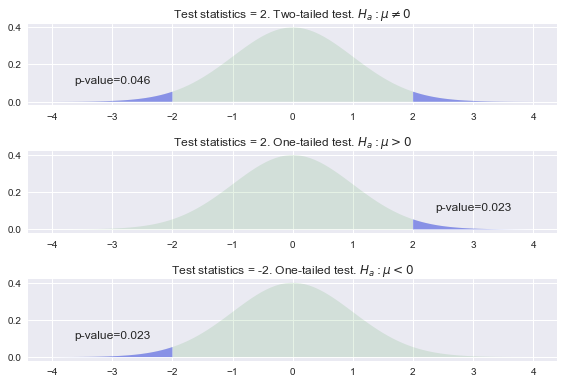

In [3]:
xx1 = np.linspace(-4, 4, 100)
xx2 = np.linspace(-4, -2, 100)
xx3 = np.linspace(2, 4, 100)

plt.subplot(3, 1, 1)
plt.fill_between(xx1, sp.stats.norm.pdf(xx1), facecolor='green', alpha=0.1)
plt.fill_between(xx2, sp.stats.norm.pdf(xx2), facecolor='blue', alpha=0.35)
plt.fill_between(xx3, sp.stats.norm.pdf(xx3), facecolor='blue', alpha=0.35)
plt.text(-3, 0.1, "p-value=%5.3f" % (2*sp.stats.norm.cdf(-2)), horizontalalignment='center')
plt.title(r"Test statistics = 2. Two-tailed test. $H_a: \mu \neq 0$")

plt.subplot(3, 1, 2)
plt.fill_between(xx1, sp.stats.norm.pdf(xx1), facecolor='green', alpha=0.1)
plt.fill_between(xx3, sp.stats.norm.pdf(xx3), facecolor='blue', alpha=0.35)
plt.text(3, 0.1, "p-value=%5.3f" % (sp.stats.norm.cdf(-2)), horizontalalignment='center')
plt.title(r"Test statistics = 2. One-tailed test. $H_a: \mu > 0$")

plt.subplot(3, 1, 3)
plt.fill_between(xx1, sp.stats.norm.pdf(xx1), facecolor='green', alpha=0.1)
plt.fill_between(xx2, sp.stats.norm.pdf(xx2), facecolor='blue', alpha=0.35)
plt.text(-3, 0.1, "p-value=%5.3f" % (sp.stats.norm.cdf(-2)), horizontalalignment='center')
plt.title(r"Test statistics = -2. One-tailed test. $H_a: \mu < 0$")

plt.tight_layout()
plt.show()

## 유의 수준과 기각역

계산된 유의 확률 값에 대해 귀무 가설을 기각하는지 채택하는지를 결정할 수 있는 기준 값을 유의 수준(level of significance)

유의 수준은 1%, 5%, 10% 

유의 수준에 대해 계산된 검정 통계량을 기각역(critical value)

기각역 값을 알고 있다면 유의 확률을 유의 수준과 비교하는 것이 아니라 검정 통계량을 직접 기각역과 비교하여 기각/채택 여부를 판단 할 수 있음



# SciPy를 사용한 기초적인 검정

- 이항 검정 (Binomial test)
- 카이 제곱 검정 (Chi-square test)
- 단일 표본 z-검정 (One-sample z-test)
- 단일 표본 t-검정 (One-sample t-test)
- 독립 표본 t-검정 (Independent-two-sample t-test)
- 대응 표본 t-검정 (Paired-two-sample t-test)
- 분산 검정 (Chi squared variance test)
- 등분산 검정 (Equal-variance test)
- 정규성 검정 (Normality test)


## 이항 검정 (Binomial test)

이항 분포를 이용하여 베르누이 분포 모수 θ 에 대한 가설을 조사하는 검정 방법

* scipy.stats.binom_test <br>
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom_test.html


* N=10 , 실제 모수 θ0=0.5인 경우 대해 이항 검정 명령

In [3]:
N = 10
theta_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(theta_0).rvs(N)
n = np.count_nonzero(x)
n

7

In [4]:
sp.stats.binom_test(n, N)

0.34374999999999989

유의 확률 (p-value) 34% 로 높아 귀무가설을 기각 할 수 없다. 

## 카이 제곱 검정 (Chi-square test)

goodness of fit 검정 <br>
카테고리 분포의 모수 θ=(θ1,…,θK) 에 대한 가설을 조사하는 검정 방법

* scipy.stats.chisquare <br>
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html


* 데이터 갯수 N=10 , 실제 모수 θ0=(0.25,0.25,0.25,0.25) 인 경우 


In [5]:
N = 10
K = 4
theta_0 = np.ones(K)/K
np.random.seed(0)
x = np.random.choice(K, N, p=theta_0)
n = np.bincount(x, minlength=K)
n
sp.stats.chisquare(n)

array([0, 3, 5, 2], dtype=int64)

Power_divergenceResult(statistic=5.1999999999999993, pvalue=0.157724450396663)

유의 확률 17.8 로 귀무가석을 기각할 수 없다. 

## 단일 표본 z-검정 (One-sample z-test)

분산 σ^2 의 값을 정확히 알고 있는 정규 분포의 표본에 대해 기댓값을 조사하는 검정

* scipy.stats.norm <br>
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

* 데이터 갯수 N=10 , 실제 모수 μ0=0 인 경우 대해 단일 표본 z-검정 


In [8]:
def ztest_1samp(x, sigma2=1, mu=0):
    z = (x.mean() - mu)/ np.sqrt(sigma2/len(x))
    return z, 2 * sp.stats.norm().sf(np.abs(z))
    

N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
x

ztest_1samp(x)

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

(2.3338341854824276, 0.019604406021683538)

유의 확률(p-value)이 1.96%이므로 만약 유의 수준이 5% 이상 ㅡ이라면 귀무 가설을 기각
데이터 개수의 부족으로 볼수 있다. (10개)

## 단일 표본 t-검정 (One-sample t-test)

정규 분포의 표본에 대해 기댓값을 조사하는 검정방법

ttest_1samp 명령의 경우에는 디폴트 모수가 없으므로 popmean 인수를 사용하여 직접 지정

* scipy.stats.ttest_1samp <br>
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html


* 데이터 갯수 N=10 , 실제 모수 μ0=0 인 경우 대해 단일표본 t-검정 

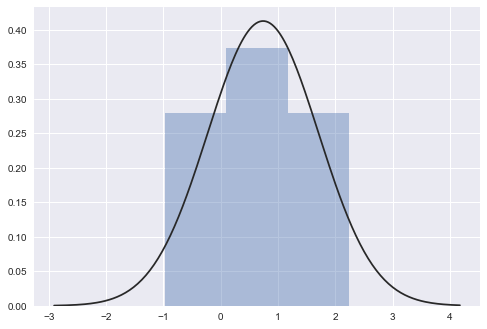

Ttest_1sampResult(statistic=2.2894396723896699, pvalue=0.047818464908570578)

In [9]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()

sp.stats.ttest_1samp(x, popmean=0)

유의 확률(p-value)이 4.78%이므로 만약 유의 수준이 5% 이상 이라면 귀무 가설을 기각

## 독립 표본 t-검정 (Independent-two-sample t-test)

two sample t-검정

두 개의 독립적인 정규 분포에서 나온 두 개의 데이터 셋을 사용하여 두 정규 분포의 기댓값이 동일한지를 검사

독립 표본 t-검정은 두 정규 분포의 분산값이 같은 경우와 같지 않은 경우에 사용하는 검정 통계량이 다르기 때문에 equal_var 인수를 사용하여 이를 지정해 주어야 함

* scipy.stats.ttest_ind <br>
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

* 두 정규 분포의 기댓값이 μ1=0, μ2=1 으로 다르고 분산은 σ1=σ2=1  으로 같으며 샘플의 수가 N1=N2=10 인 경우


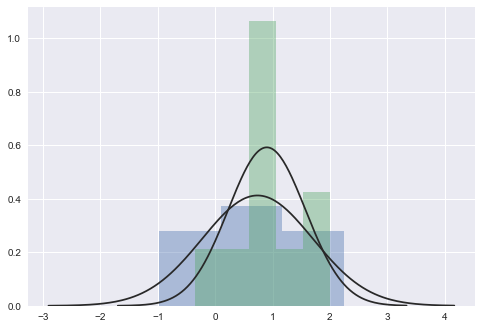

Ttest_indResult(statistic=-0.41399685269886549, pvalue=0.68376768941164268)

In [10]:
N_1 = 10; mu_1 = 0; sigma_1 = 1
N_2 = 10; mu_2 = 0.5; sigma_2 = 1
np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()

sp.stats.ttest_ind(x1, x2, equal_var=True)

유의 확률(p-value)이 68.4%이므로 귀무 가설을 기각

## 대응 표본 t-검정 (Paired-two-sample t-test)

대응 표본 t-검정은 독립 표본 t-검정을 두 집단의 샘플이 1대1 대응하는 경우에 대해 수정한 것, 두 정규 분포의 기댓값이 같은지 확인하기 위한 검정

예) 어떤 반의 학생들이 특강을 수강하기 전과 후에 각각 시험을 본 시험 점수의 경우, 같은 학생의 두 점수는 대응할 수 있다. 이 대응 정보를 알고 있다면 보통의 독립 표본 t-검정에서 발생할 수 있는 샘플간의 차이의 영향을 없앨 수 있기 때문에 특강 수강의 영향을 보다 정확하게 추정할 수 있다.

* scipy.stats.ttest_rel <br>
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html



* μ1=0, μ2=0.5 로 평균이 달라진 경우에 대해 대응 표본 t-검정


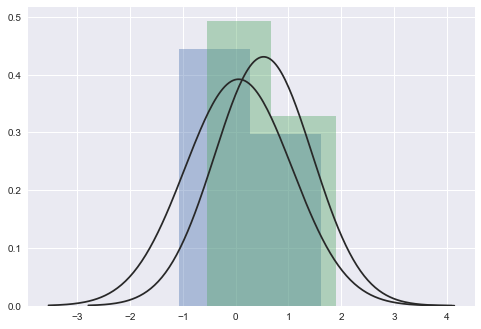

Ttest_relResult(statistic=-7.1723380661732756, pvalue=0.0020008849290622677)

In [13]:
N = 5
mu_1 = 0
mu_2 = 0.5
np.random.seed(1)
x1 = sp.stats.norm(mu_1).rvs(N)
x2 = x1 + sp.stats.norm(mu_2, 0.1).rvs(N)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()

sp.stats.ttest_rel(x1, x2)

## 카이 제곱 분산 검정 (Chi-Square Test for the Variance)

정규 분포의 분산
 
정규 분포의 샘플 분산 값은 정규화 하면 카이 제곱 분포를 따른다는 점을 이용하는 검정 방법


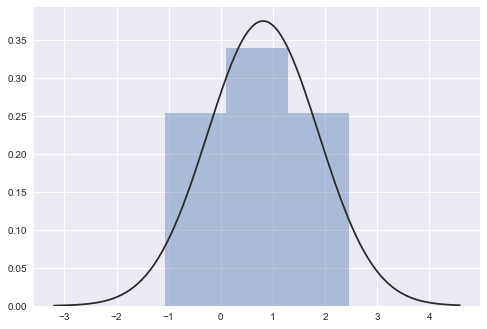

1.0637871321863899

(11.316430626053437, 0.25464123584764542)

In [14]:
def chi2var_test(x, sigma2=1):
    v = x.var(ddof=1)
    t = (len(x) - 1)*v/sigma2
    return t, sp.stats.chi2(df=len(x)-1).sf(np.abs(t))

N = 10
mu_0 = 0
sigma_0 = 1.1
np.random.seed(0)
x = sp.stats.norm(mu_0, sigma_0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()
x.std()

chi2var_test(x)

## 등분산 검정 (Equal-variance test)

두 정규 분포로부터 생성된 두 개의 데이터 집합으로부터 두 정규 분포의 분산 모수가 같은지 확인하기 위한 검정

가장 기본적인 방법은 F분포를 사용하는 것이지만 실무에서는 이보다 더 성능이 좋은 bartlett, fligner, levene 방법을 주로 사용
 
* scipy.stats.bartlett <br>
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html
* scipy.stats.fligner <br>
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fligner.html
* scipy.stats.levene <br>
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html 

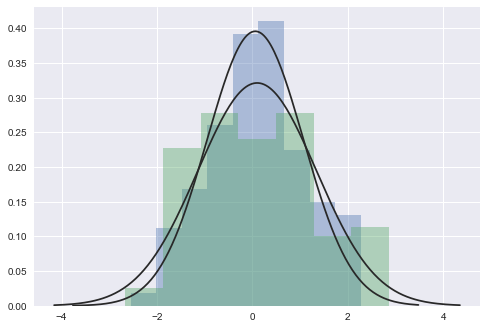

(1.0078822447165796, 1.2416003969261071)

BartlettResult(statistic=4.2534738372322662, pvalue=0.039170128783651344)

FlignerResult(statistic=7.2248419904094572, pvalue=0.0071901501067483673)

LeveneResult(statistic=7.6807089476794372, pvalue=0.0061135154970207925)

In [15]:
N1 = 100
N2 = 100
sigma_1 = 1
sigma_2 = 1.2
np.random.seed(0)
x1 = sp.stats.norm(0, sigma_1).rvs(N1)
x2 = sp.stats.norm(0, sigma_2).rvs(N2)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()
x1.std(), x2.std()

sp.stats.bartlett(x1, x2)
sp.stats.fligner(x1, x2)
sp.stats.levene(x1, x2)

## 정규성 검정

가우시안 정규 분포를 따르는지 아닌지를 확인하는 것

#### statsmodels에서 제공하는 정규성 검정 명령어

* Omnibus Normality test

    * statsmodels.stats.stattools.omni_normtest
        http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.stattools.omni_normtest.html


* Jarque–Bera test

    * statsmodels.stats.stattools.jarque_bera
    http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.stattools.jarque_bera.html


* Kolmogorov-Smirnov test

    * statsmodels.stats.diagnostic.kstest_normal
    http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.diagnostic.kstest_normal.html


* Lilliefors test

    * statsmodels.stats.diagnostic.lillifors
    http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.diagnostic.lillifors.html



#### SciPy 에서 제공하는 정규성 검정 명령어

* Kolmogorov-Smirnov test

    * scipy.stats.ks_2samp
    http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html


* Shapiro–Wilk test

    * scipy.stats.shapiro
    http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html


* Anderson–Darling test

    * scipy.stats.anderson
    http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html


* D'Agostino's K-squared test

    * scipy.stats.mstats.normaltest
    http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.normaltest.html


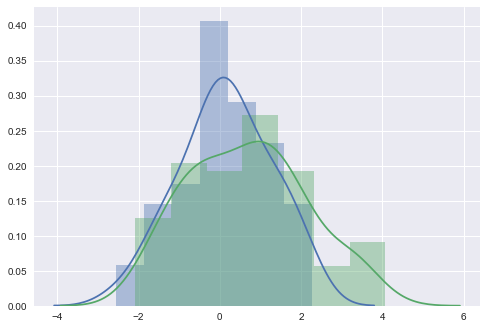

Ks_2sampResult(statistic=0.23000000000000004, pvalue=0.049516112814422863)

In [16]:
np.random.seed(0)
N1 = 50
N2 = 100
x1 = sp.stats.norm(0, 1).rvs(N1)
x2 = sp.stats.norm(0.5, 1.5).rvs(N2)
sns.distplot(x1)
sns.distplot(x2)
plt.show()
sp.stats.ks_2samp(x1, x2)

# 37절: 최대 우도 모수 추정

# 모멘트 방법

모집단 확률 분포 변수, 모수를 추정하는 방법 <br>
적률(moment)은 '임의의 점에 대한 가중 효과 내지 가중치'를 의미, 확률분포에 있어서는 평균과 분포, 왜도와 첨도 등을 일반화시킨 것이다. 

1차 모멘트(기댓값, 평균)의 경우

* 이론적인 모형 평균  μ=E[X] = 샘플 평균  x

    $\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i$

2차 모멘트(분산)의 경

* 이론적인 모형 분산  σ2=E[(X−μ)2] = 샘플 분산 s^2

    $\bar{s}^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - \bar{x})^2$


## 베르누이 분포의 모수 추정

$\text{E}[X] = \theta = \dfrac{1}{N} \sum_{i=1}^N x_i  = \dfrac{N1}{N}$

## 정규 분포의 모수 추정 

$\text{E}[X] = \mu = \dfrac{1}{N} \sum_{i=1}^N x_i  = \bar{x}$

$\text{E}[(X-\mu)^2] = \sigma^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - \mu)^2 = s^2$


## 베타 분포의 모수 추정 

$\text{E}[X] = \dfrac{a}{a+b} = \bar{x}$

$\text{E}[(X-\mu)^2] = \dfrac{ab}{(a+b)^2(a+b+1)} = s^2$


# MLE(Maximum Likelihood Estimation)의 원리

최대가능도 추정법(최대 우도 추정법) 확률 모형의 모수 추정에서 가장 일반적으로 사용되는 방법

모집단에서 추출한 표본으로 가장 가능성이 큰 (가장 그럴듯한) 모수를 구하는 방법, 대략적으로 설명하면 어떤 일이 있을 가능성이 가장 큰 값을 추정치로 제시하는 방법


모집단에서 무작위로݊개 추출한 표본값들을 서로 독립으로가정하자. 표본을 얻을가능성(즉, 우도함수,L)은 표본값들의결합밀도함수 f(x1..xn)로표현되며, 이 결합밀도함수는 표본값들이 서로독립이므로 각표본값 확률밀도함수의 f(x1..xn) 곱으로 나타낼 수있다. 

## Likelihood


결합밀도함수인 가능도 함수(우도함수, likelihood function)

L(θ)의 값을 최대로 하는 θ의 추정량, 최대 가능도 추정량 (MLE, maximum likelihood estimator)

* 가능도의 직관적인 정의 : 확률분포함수의 y값
    - 셀 수 있는 사건: 가능도 = 확률
    - 연속 사건: 가능도 ≠ 확률, 가능도 = PDF(Probability Density Function))값



## MLE(Maximum Likelihood Estimation)

MLE(Maximum Likelihood Estimation) 방법은 주어진 샘플 x 에 대해 likelihood를 가장 크게 해 주는 모수 θ 를 찾는 방법


* 예1: 모양이 일그러진 동전
http://rpubs.com/Statdoc/204928


지금까지와는 다르게 이 동전은 모양이 많이 일그러져서 앞이 나올 확률이 0.5라고 말할 수가 없고, 실제로 던져봐야 그 확률을 알 수 있을 것 같다. 실제로 1000번을 던져봤더니 앞이 400번, 뒤가 600번 나왔다면 우리는 동전을 던져 앞이 나올 확률 p가  0.4정도라고 생각할 것이며 이것은 p의 MLE값과 일치한다. 풀어서 설명하면 **동전을 1000번 던져서 앞이 400번 나올 가능성을 최대로 하는 p는 0.4**라는 뜻이다.
   

암의 가능성이 최대가 되는 확률 (Gradient Ascent)

# 38절: 베이지안 모수추정

# 베이지안 모수 추정

모수의 값이 가질 수 있는 모든 가능성, 즉 모수의 분포를 계산하는 작업

* 모수의 분포를 표현 방법
    1. 비모수적(non-parametric) 방법

    샘플을 제시한 후 히스토그램와 같은 방법으로 임의의 분포를 표현한다. MCMC(Markov chain Monte Carlo)와 같은 몬테카를로 방법에서 사용한다.
    
    2. 모수적(parametric) 방법

    모수의 분포를 잘 알려진 확률 분포 모형을 사용하여 나타낸다. 이렇게 하면 모수를 나타내는 확률 분포 수식이 다시 모수(parameter)를 가지게 되는데 이를 hyper-parameter라고도 부른다. 모수적 방법은 결국 hypter-parameter의 값을 숫자로 계산하는 작업이 된다.
    
## 베이지안 모수 추정의 기본 원리

$p(\theta \mid x_{1},\ldots,x_{N}) = \dfrac{p(x_{1},\ldots,x_{N} \mid \theta) \cdot p(\theta)}{p(x_{1},\ldots,x_{N})} \propto p(x_{1},\ldots,x_{N}  \mid \theta )  \cdot p(\theta)$ 

* p(θ) : 사전(Prior) 분포, 베이지안 추정 작업을 하기 전에 이미 알고 있던 모수 θ 의 분포

* p(x1,…,xN∣θ) 분포:  Likelihood 분포, 현재 우리가 알고 있는 값은 데이터  x1,…,xN 이고 θ 가 미지수, 이와 반대로 θ 를 알고 있는 상태에서의 데이터 x1,…,xN  가 나올 조건부 확률 분포: Likelihood 


그밖에.. 베르누이, 카테고리, 정규분포의 기댓값 모수 추정 등이 있음 



http://www.4four.us/article/2014/11/markov-chain-monte-carlo
https://ratsgo.github.io/statistics/2017/05/31/gibbs/


* 몬테카를로

    몬테카를로 방법은, 수식만으로 계산하기 어려운 문제가 있을 때 데이터의 무작위 샘플을 얻은 뒤 그 샘플을 이용해서 답을 구하는 방법, 점을 찍는 시도가 많아질수록 추정치는 실제값에 가까워진다. 

    예) 2차원 좌표에 원점을 중심으로 가로세로 2인 사각형 안에 원점으로부터 거리가 1이하인 점의 비율을 계산, 이 비율을 사각형의 넓이에 4를 곱해서 반지름이 1인 원의 넓이 추정 


* 마코프 체인

    각각의 상태는 서로 독립이 아니라 이전의 상태에 영향을 받음, 몇 가지 추가 조건이 만족한다면, k가 충분히 커지면 Xk의 분포는 특정한 값으로 수렴한다는 점, 최종적으로 수렴하는 확률분포는 동일 하다. 


* 마코프 체인 몬테카를로 (Markov Chain Monte Carlo Method, 약칭 MCMC)

    몬테 카를로 방법 중에서도 특정한 확률분포에 수렴하는 난수들을 추출하고 싶을 경우에 사용하는 방법

    몬테카를로 방법은 모든 샘플이 독립(independent)이고 생성될(뽑힐) 확률 또한 랜덤입니다. 반면 마코프 연쇄에 기반한 MCMC는 다음번 생성될(뽑힐) 샘플은 현재 샘플의 영향을 받는다.


* 깁스 샘플링(Gibbs Sampling)
    
     다음번 생성될 표본은 현재 샘플에 영향을 받는다는 점에서는 MCMC와 같지만, 나머지 변수는 그대로 두고 한 변수에만 변화를 준다는 점이 다르다.
     
     